In [181]:
# GENERAL PACKAGE IMPORT
# ----------------------
import sys
sys.path.append('/Users/huangwp/Documents/git/HIL-Sim/flexlab/db_layer') 
from db_interface import DB_Interface
import requests
import numpy as np
import json
import pandas as pd
from pandas import DataFrame
from io import StringIO

import datetime as dt
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import date2num
import seaborn
import timeit
import json
import pickle

import matplotlib.pyplot as plt
import datetime
import db_plotting

In [182]:

data23 = pd.read_csv('data22_revised.csv', parse_dates = True, index_col = 0)
#data22_original = pd.read_csv('data22_revised.csv', parse_dates = True, index_col = 0)
data22 = pd.read_csv('FlexlabX1aNoLeakBaseline0907 (0901).csv', parse_dates = True)
#data23 = pd.read_csv('data23_revised.csv', parse_dates = True, index_col = 0)
day_range=[9,1,1]

# use data23 here as the 1A FLEXLAB test with the 

In [183]:
data22["datetime"]=pd.to_datetime(data22["time"], unit='s',origin='2021-01-01') # change cumulative data to the "date" format

In [184]:
data22['datetime'] = pd.to_datetime(data22['datetime'])
data23['datetime'] = pd.to_datetime(data23['datetime'])
data22=data22.set_index('datetime')

In [185]:
data22.dtypes

Unnamed: 0                                     int64
time                                         float64
AHU: MAT                                     float64
AHU: RAT                                     float64
VAV: Core Zone Discharge Air Temperature     float64
VAV: North Zone Discharge Air Temperature    float64
VAV: South Zone Discharge Air Temperature    float64
VAV: Core Zone Airflow Rate                  float64
VAV: North Zone Airflow Rate                 float64
VAV: South Zone Airflow Rate                 float64
Outdoor Air Temperature                      float64
AHU: Supply Air Temperature                  float64
AHU: Outdoor Air Damper Position             float64
AHU: Return Air Damper Position              float64
VAV: Core Zone Room Air Temperature          float64
VAV: Core Zone Reheat Control Signal         float64
VAV: Core Zone Damper Control Signal         float64
VAV: North Zone Room Air Temperature         float64
VAV: North Zone Reheat Control Signal        f

In [186]:
print(data22)

                     Unnamed: 0        time   AHU: MAT   AHU: RAT  \
datetime                                                            
2021-09-01 00:00:00           0  20995200.0  68.000000  68.000000   
2021-09-01 00:02:00           1  20995320.0  62.827637  67.975494   
2021-09-01 00:04:00           3  20995440.0  62.655975  67.911835   
2021-09-01 00:05:00           5  20995500.0  62.603954  67.921720   
2021-09-01 00:06:00           7  20995560.0  60.775720  67.929580   
...                         ...         ...        ...        ...   
2021-09-01 23:54:00        1733  21081240.0  63.641064  68.107285   
2021-09-01 23:55:00        1735  21081300.0  63.665450  68.105250   
2021-09-01 23:56:00        1737  21081360.0  63.689953  68.102830   
2021-09-01 23:58:00        1740  21081480.0  63.718460  68.064480   
2021-09-02 00:00:00        1742  21081600.0  63.771310  68.060530   

                     VAV: Core Zone Discharge Air Temperature  \
datetime                             

In [187]:
print(data23)

                     desk1_plug_power  desk2_plug_power  desk3_plug_power  \
time                                                                        
2021-08-20 23:45:00               NaN               NaN               NaN   
2021-08-21 00:00:00         34.139420          8.067873         34.185020   
2021-08-21 00:15:00         34.032287          8.271507         34.119960   
2021-08-21 00:30:00         34.080907          8.123280         34.443220   
2021-08-21 00:45:00         34.109420          8.302420         34.686187   
...                               ...               ...               ...   
2021-09-01 22:45:00         33.714193          8.044007         34.458727   
2021-09-01 23:00:00         33.924427          7.903047         34.677213   
2021-09-01 23:15:00         34.532067          8.139600         34.071793   
2021-09-01 23:30:00         33.790973          7.899593         34.821107   
2021-09-01 23:45:00         33.993833          7.981587         33.682153   

In [188]:
print(data22[['AHU:Cooling Coil Load','Outdoor Air Temperature']].head(50))

                     AHU:Cooling Coil Load  Outdoor Air Temperature
datetime                                                           
2021-09-01 00:00:00               0.000000                56.300000
2021-09-01 00:02:00             -69.929680                56.283794
2021-09-01 00:04:00             -64.889694                56.267097
2021-09-01 00:05:00             -44.233654                56.258636
2021-09-01 00:06:00             -71.879570                56.250070
2021-09-01 00:08:00              -0.628564                56.232650
2021-09-01 00:10:00              17.387049                56.214855
2021-09-01 00:12:00               6.657021                56.196840
2021-09-01 00:14:00               6.111194                56.178490
2021-09-01 00:15:00               3.456294                56.169205
2021-09-01 00:16:00               0.005330                56.159924
2021-09-01 00:18:00               1.030228                56.141136
2021-09-01 00:20:00              -1.714617      

In [189]:
data22['AHU:Cooling Coil Load']=data22['AHU:Cooling Coil Load'].resample('15T', label='right', closed='right').mean() 
data22['AHU: Cooling coil Load']=data22['AHU: Cooling coil Load'].resample('15T', label='right', closed='right').mean() 
data22['AHU: Supply Fan Power']=data22['AHU: Supply Fan Power'].resample('15T', label='right', closed='right').mean() 
 



data22=data22.resample('15T').asfreq()


# I process data to 15 min interval so that the temperature dataset takes current time value
# but energy dataset takes mean value in the past 15 min
# in order to agree with FLEXLAB test data processing

In [190]:
print(data22[['AHU:Cooling Coil Load','Outdoor Air Temperature']].head(50))

                     AHU:Cooling Coil Load  Outdoor Air Temperature
datetime                                                           
2021-09-01 00:00:00               0.000000                56.300000
2021-09-01 00:15:00             -24.216623                56.169205
2021-09-01 00:30:00              -0.621238                56.026276
2021-09-01 00:45:00              -0.988863                55.885155
2021-09-01 01:00:00              10.173688                55.760020
2021-09-01 01:15:00              -0.908334                55.653122
2021-09-01 01:30:00               0.438023                55.557487
2021-09-01 01:45:00              -1.778895                55.473114
2021-09-01 02:00:00               1.948590                55.400000
2021-09-01 02:15:00              -0.128978                55.338146
2021-09-01 02:30:00               0.098235                55.287500
2021-09-01 02:45:00              -0.299841                55.248116
2021-09-01 03:00:00               0.316436      

In [191]:


data22['datetime']=data22.index
data22['1B-OAT-1']=data22['Outdoor Air Temperature']
# add these columns so that later analysis codes don't return an error

In [192]:
print(data22.isnull().sum())   # normal if everything is zero

Unnamed: 0                                   0
time                                         0
AHU: MAT                                     0
AHU: RAT                                     0
VAV: Core Zone Discharge Air Temperature     0
VAV: North Zone Discharge Air Temperature    0
VAV: South Zone Discharge Air Temperature    0
VAV: Core Zone Airflow Rate                  0
VAV: North Zone Airflow Rate                 0
VAV: South Zone Airflow Rate                 0
Outdoor Air Temperature                      0
AHU: Supply Air Temperature                  0
AHU: Outdoor Air Damper Position             0
AHU: Return Air Damper Position              0
VAV: Core Zone Room Air Temperature          0
VAV: Core Zone Reheat Control Signal         0
VAV: Core Zone Damper Control Signal         0
VAV: North Zone Room Air Temperature         0
VAV: North Zone Reheat Control Signal        0
VAV: North Zone Damper Control Signal        0
VAV: South Zone Room Air Temperature         0
VAV: South Zo

In [193]:
print(data22)

                     Unnamed: 0        time   AHU: MAT   AHU: RAT  \
datetime                                                            
2021-09-01 00:00:00           0  20995200.0  68.000000  68.000000   
2021-09-01 00:15:00          17  20996100.0  62.522270  67.720670   
2021-09-01 00:30:00          35  20997000.0  62.327760  67.466230   
2021-09-01 00:45:00          54  20997900.0  62.091660  67.145430   
2021-09-01 01:00:00          71  20998800.0  61.892590  66.861320   
...                         ...         ...        ...        ...   
2021-09-01 23:00:00        1667  21078000.0  63.450510  68.856384   
2021-09-01 23:15:00        1686  21078900.0  63.373764  68.617325   
2021-09-01 23:30:00        1703  21079800.0  63.374863  68.398910   
2021-09-01 23:45:00        1724  21080700.0  63.542076  68.216156   
2021-09-02 00:00:00        1742  21081600.0  63.771310  68.060530   

                     VAV: Core Zone Discharge Air Temperature  \
datetime                             

In [194]:
print(data23)

                     desk1_plug_power  desk2_plug_power  desk3_plug_power  \
time                                                                        
2021-08-20 23:45:00               NaN               NaN               NaN   
2021-08-21 00:00:00         34.139420          8.067873         34.185020   
2021-08-21 00:15:00         34.032287          8.271507         34.119960   
2021-08-21 00:30:00         34.080907          8.123280         34.443220   
2021-08-21 00:45:00         34.109420          8.302420         34.686187   
...                               ...               ...               ...   
2021-09-01 22:45:00         33.714193          8.044007         34.458727   
2021-09-01 23:00:00         33.924427          7.903047         34.677213   
2021-09-01 23:15:00         34.532067          8.139600         34.071793   
2021-09-01 23:30:00         33.790973          7.899593         34.821107   
2021-09-01 23:45:00         33.993833          7.981587         33.682153   

In [195]:

print(data23['1A-El-CHWP'])

time
2021-08-20 23:45:00    53.170039
2021-08-21 00:00:00    53.002608
2021-08-21 00:15:00    53.054407
2021-08-21 00:30:00    52.995898
2021-08-21 00:45:00    53.024932
                         ...    
2021-09-01 22:45:00    53.404302
2021-09-01 23:00:00    53.159955
2021-09-01 23:15:00    53.146679
2021-09-01 23:30:00    53.098214
2021-09-01 23:45:00    53.096476
Name: 1A-El-CHWP, Length: 1153, dtype: float64


In [196]:
data22['date'] = data22['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
data22['time'] = data22['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

data23['date'] = data23['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
data23['time'] = data23['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

In [197]:
baseline_day_mask = (data23['date'] >= datetime.date(2021, 8, 21)) & (data23['date'] <= datetime.date(2021, 8, 21))
test_day_mask22 = (data22['date'] >= datetime.date(2021, day_range[0], day_range[1])) & (data22['date'] <= datetime.date(2021, day_range[0], day_range[2])) 
test_day_mask23 = (data23['date'] >= datetime.date(2021, day_range[0], day_range[1])) & (data23['date'] <= datetime.date(2021, day_range[0], day_range[2]))

In [198]:
print(baseline_day_mask)
print(test_day_mask22)
print(test_day_mask23)

time
2021-08-20 23:45:00    False
2021-08-21 00:00:00     True
2021-08-21 00:15:00     True
2021-08-21 00:30:00     True
2021-08-21 00:45:00     True
                       ...  
2021-09-01 22:45:00    False
2021-09-01 23:00:00    False
2021-09-01 23:15:00    False
2021-09-01 23:30:00    False
2021-09-01 23:45:00    False
Name: date, Length: 1153, dtype: bool
datetime
2021-09-01 00:00:00     True
2021-09-01 00:15:00     True
2021-09-01 00:30:00     True
2021-09-01 00:45:00     True
2021-09-01 01:00:00     True
                       ...  
2021-09-01 23:00:00     True
2021-09-01 23:15:00     True
2021-09-01 23:30:00     True
2021-09-01 23:45:00     True
2021-09-02 00:00:00    False
Freq: 15T, Name: date, Length: 97, dtype: bool
time
2021-08-20 23:45:00    False
2021-08-21 00:00:00    False
2021-08-21 00:15:00    False
2021-08-21 00:30:00    False
2021-08-21 00:45:00    False
                       ...  
2021-09-01 22:45:00     True
2021-09-01 23:00:00     True
2021-09-01 23:15:00     Tr

In [199]:
data_baseline0=data23[baseline_day_mask]
data22 = data22[test_day_mask22]
data23 = data23[test_day_mask23]
#print(data_baseline0)

In [200]:
data_baseline0A=data_baseline0.copy(deep=True)
data_baseline0B=data_baseline0.copy(deep=True)



In [201]:
data_baseline0A.index=data_baseline0A.index+pd.to_timedelta(11,unit='d')

data_baseline0B.index=data_baseline0B.index+pd.to_timedelta(2,unit='d')
data_baseline = data_baseline0A
#data_baseline = data_baseline0A.append(data_baseline0B)
#data_baseline = pd.concat(frames)


# here I use the temperature setpoint data from date 08/21/2021 as the baseline temperature setpoint for the model 
# data (data22). I need to manually increment the days to match up the datatime for later plotting use

In [202]:
print(data_baseline)

                     desk1_plug_power  desk2_plug_power  desk3_plug_power  \
time                                                                        
2021-09-01 00:00:00         34.139420          8.067873         34.185020   
2021-09-01 00:15:00         34.032287          8.271507         34.119960   
2021-09-01 00:30:00         34.080907          8.123280         34.443220   
2021-09-01 00:45:00         34.109420          8.302420         34.686187   
2021-09-01 01:00:00         34.337320          7.940947         34.927867   
...                               ...               ...               ...   
2021-09-01 22:45:00         33.842467          8.092507         34.662933   
2021-09-01 23:00:00         34.225773          8.136513         34.559740   
2021-09-01 23:15:00         33.781613          7.943327         34.009013   
2021-09-01 23:30:00         34.386813          7.963047         34.448420   
2021-09-01 23:45:00         33.785427          8.199240         34.636660   

In [203]:
data22['gta_window'] = 0
data23['gta_window'] = 0

gta_st = datetime.time(14,0,0)
gta_en = datetime.time(18,0,0)




gta_ts = (data23['time'] > gta_st) & (data23['time'] <= gta_en)

data22['gta_window'][gta_ts] = 1
data23['gta_window'][gta_ts] = 1

print(data22['gta_window'][gta_ts])
print(data23['gta_window'][gta_ts])

datetime
2021-09-01 14:15:00    1
2021-09-01 14:30:00    1
2021-09-01 14:45:00    1
2021-09-01 15:00:00    1
2021-09-01 15:15:00    1
2021-09-01 15:30:00    1
2021-09-01 15:45:00    1
2021-09-01 16:00:00    1
2021-09-01 16:15:00    1
2021-09-01 16:30:00    1
2021-09-01 16:45:00    1
2021-09-01 17:00:00    1
2021-09-01 17:15:00    1
2021-09-01 17:30:00    1
2021-09-01 17:45:00    1
2021-09-01 18:00:00    1
Freq: 15T, Name: gta_window, dtype: int64
time
2021-09-01 14:15:00    1
2021-09-01 14:30:00    1
2021-09-01 14:45:00    1
2021-09-01 15:00:00    1
2021-09-01 15:15:00    1
2021-09-01 15:30:00    1
2021-09-01 15:45:00    1
2021-09-01 16:00:00    1
2021-09-01 16:15:00    1
2021-09-01 16:30:00    1
2021-09-01 16:45:00    1
2021-09-01 17:00:00    1
2021-09-01 17:15:00    1
2021-09-01 17:30:00    1
2021-09-01 17:45:00    1
2021-09-01 18:00:00    1
Name: gta_window, dtype: int64


/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1052/484888820.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data22['gta_window'][gta_ts] = 1
/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1052/484888820.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data23['gta_window'][gta_ts] = 1


In [204]:
data22['date']

datetime
2021-09-01 00:00:00    2021-09-01
2021-09-01 00:15:00    2021-09-01
2021-09-01 00:30:00    2021-09-01
2021-09-01 00:45:00    2021-09-01
2021-09-01 01:00:00    2021-09-01
                          ...    
2021-09-01 22:45:00    2021-09-01
2021-09-01 23:00:00    2021-09-01
2021-09-01 23:15:00    2021-09-01
2021-09-01 23:30:00    2021-09-01
2021-09-01 23:45:00    2021-09-01
Freq: 15T, Name: date, Length: 96, dtype: object

In [205]:
print(data22.columns)
print(data23.columns)
#print(data22_original.columns)

Index(['Unnamed: 0', 'time', 'AHU: MAT', 'AHU: RAT',
       'VAV: Core Zone Discharge Air Temperature',
       'VAV: North Zone Discharge Air Temperature',
       'VAV: South Zone Discharge Air Temperature',
       'VAV: Core Zone Airflow Rate', 'VAV: North Zone Airflow Rate',
       'VAV: South Zone Airflow Rate', 'Outdoor Air Temperature',
       'AHU: Supply Air Temperature', 'AHU: Outdoor Air Damper Position',
       'AHU: Return Air Damper Position',
       'VAV: Core Zone Room Air Temperature',
       'VAV: Core Zone Reheat Control Signal',
       'VAV: Core Zone Damper Control Signal',
       'VAV: North Zone Room Air Temperature',
       'VAV: North Zone Reheat Control Signal',
       'VAV: North Zone Damper Control Signal',
       'VAV: South Zone Room Air Temperature',
       'VAV: South Zone Reheat Control Signal',
       'VAV: South Zone Damper Control Signal', 'AHU:Cooling Coil Load',
       'AHU: Cooling coil Load', 'VAV:Core zone Q', 'AHU: Supply Fan Power',
       'AHU:

### Metrics

In [206]:
data22 = data22.assign(COP='COP') 
#data22['COP'] = data22['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
data22['COP'] = 2.9
data23 = data23.assign(COP='COP') 
#data23['COP'] = data23['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
data23['COP'] = 2.9


In [207]:
data22 = data22.assign(chiller = 'Chiller_load') 
data22['Chiller_load'] = (data22['AHU:Cooling Coil Load']/data22['COP'])


# if change to 1/1.225, can comment out the first 2 lines
data22['AHU: Supply Fan Airflow Rate']=data22['AHU: Supply Fan Airflow Rate'].apply(lambda x: (x/1.225/1.225))
data22['AHU: Supply Fan Airflow Rate']=data22['AHU: Supply Fan Airflow Rate'].apply(lambda x: (x/2118.8))
data22['AHU: Supply Fan Power']=data22['AHU: Supply Fan Airflow Rate'].apply(lambda x: (-391*x**2+687*x+140))

data22['cooling_power [W]'] = data22['AHU: Supply Fan Power'] + data22['Chiller_load']

data23 = data23.assign(chiller = 'Chiller_load') 
data23['Chiller_load'] = (data23['1A-Th-Chilled Water']/data23['COP'])*-1
data23['cooling_power [W]'] = data23['1A-El-AHU'] + data23['Chiller_load']
#data23['cooling_power [W]'] = data23['1B-El-AHU'] + data23['1B-El-Exhaust Fan'] + data23['1B-El-CHWP'] + data23['Chiller_load']

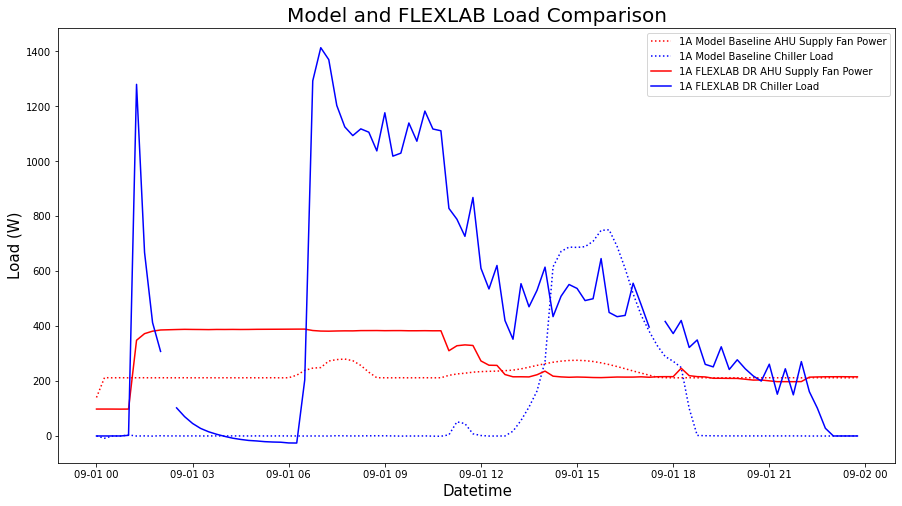

In [208]:
#data22['AHU: Supply Fan Power'].plot(kind='line',figsize=(15,8),legend=True)
#data22['Chiller_load'].plot(kind='line',figsize=(15,8),legend=True)
#data23['1A-El-AHU'].plot(kind='line',figsize=(15,8),legend=True)
#data23['Chiller_load'].plot(kind='line',figsize=(15,8),legend=True)

#data22_original['1A-El-CHWP'].plot(kind='line',figsize=(15,8),legend=True)
#data22_original['1A-El-Exhaust Fan'].plot(kind='line',figsize=(15,8),legend=True)






fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

lns1=ax_left.plot(data22.index,data22['AHU: Supply Fan Power'],'r:',label="1A Model Baseline AHU Supply Fan Power")
lns2=ax_left.plot(data22.index,data22['Chiller_load'],'b:', label="1A Model Baseline Chiller Load")
lns3=ax_left.plot(data23.index,data23['1A-El-AHU'],'r-', label="1A FLEXLAB DR AHU Supply Fan Power")
lns4=ax_left.plot(data23.index,data23['Chiller_load'],'b-', label="1A FLEXLAB DR Chiller Load")
plt.title('Model and FLEXLAB Load Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Load (W)',fontsize=15)

lns=lns1+lns2+lns3+lns4
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
#ax_left.set_ylim([50,68.3])
#ax_right.set_ylim([-0.1,2.4])
plt.show()

In [209]:


en_1a = []
en_1b = []

# define dates for the calculation
for day in range(day_range[1], day_range[2]+1):    
    mask_1 = data23['date'] == datetime.date(2021, day_range[0], day)
    print(day)
    day_en_1a = round((data22['cooling_power [W]'][mask_1].sum()/4000),2)
    en_1a.append(day_en_1a)
      
    day_en_1b = round((data23['cooling_power [W]'][mask_1].sum()/4000),2)
    en_1b.append(day_en_1b)
    
print(en_1a)
print(en_1b)

1
[7.95]
[17.19]


/Users/huangwp/Documents/git/HIL-Sim/flexlab/test_data_analysis/db_plotting.py:38: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)


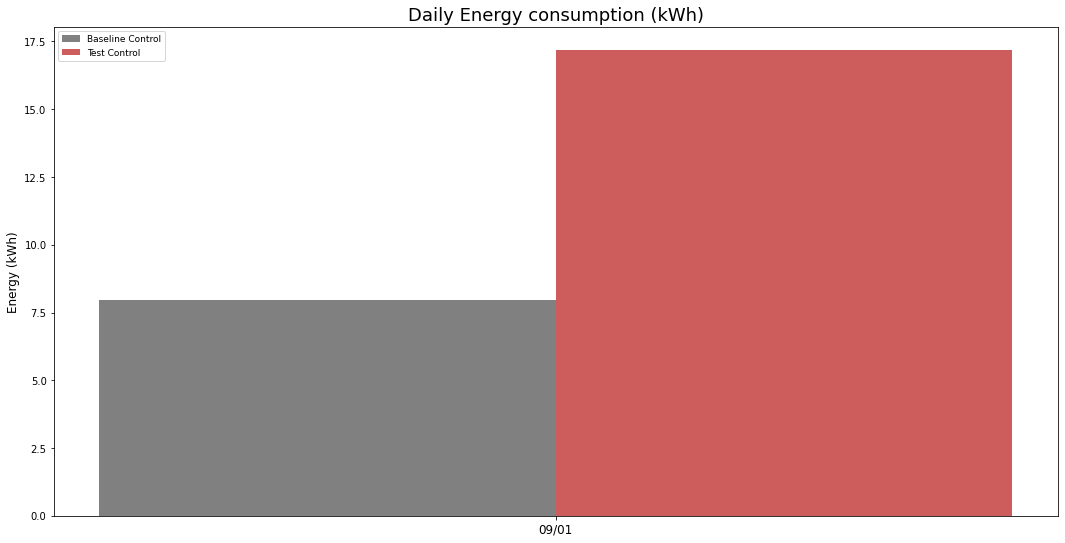

In [210]:
db_plotting.energy_plot(data23, en_1a, en_1b, 'Daily Energy consumption (kWh)', 'Energy (kWh)')

### Shed

In [211]:
#data23['G36 Demand Shed'] = data23['cooling_power [W]'] - data22['cooling_power [W]']

shed_1a = []
shed_1b = []

# define dates for the calculation
for day in range(day_range[1], day_range[2]+1):    
    mask_1 = data22['date'] == datetime.date(2021, day_range[0], day)
    #print(day) 
    day_shed_1a = (data22['cooling_power [W]'][mask_1][gta_ts].mean())
    shed_1a.append(day_shed_1a)
    
    day_shed_1b = (data23['cooling_power [W]'][mask_1][gta_ts].mean())
    shed_1b.append(day_shed_1b)


    #day_shed_1b = (data23['G36 Demand Shed'][mask_1][gta_ts].mean())
    #shed_1b.append(day_shed_1b)

In [212]:
data22['cooling_power [W]'][mask_1][gta_ts]

datetime
2021-09-01 14:15:00     884.013545
2021-09-01 14:30:00     944.052243
2021-09-01 14:45:00     962.289010
2021-09-01 15:00:00     961.800581
2021-09-01 15:15:00     963.199295
2021-09-01 15:30:00     979.605478
2021-09-01 15:45:00    1014.591953
2021-09-01 16:00:00    1010.314291
2021-09-01 16:15:00     942.561704
2021-09-01 16:30:00     854.222798
2021-09-01 16:45:00     754.139911
2021-09-01 17:00:00     668.411315
2021-09-01 17:15:00     602.442909
2021-09-01 17:30:00     542.844233
2021-09-01 17:45:00     501.128211
2021-09-01 18:00:00     483.322298
Freq: 15T, Name: cooling_power [W], dtype: float64

In [213]:
#print(data23['G36 Demand Shed'][gta_ts])
#print(data23['G36 Demand Shed'])

In [214]:
def shed_demand_plot(data, list_1, list_2, title, y_label):
    fig, (ax) = plt.subplots(nrows = 1, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',figsize = (18,9))
    fig.subplots_adjust(hspace = .2, wspace=.15)

    inp_day = data['date'].unique() # capture unique dates from the date column
    inp_day = inp_day.tolist() #convert to a list
    #print(inp_day)
    # create labels for each date of the test
    labels = []
    labels1 = []
    for i in range(0,len(inp_day)):
        labels.append(inp_day[i].strftime('%m/%d'))

    #for i in range(0,len(inp_day)-1):
        #labels1.append(inp_day[i].strftime('%m/%d'))

    x = np.arange(len(labels))
    #x = np.arange(len(labels)-1)
    print(labels)
    print(list_2)
    width = .2

    ax.bar(x-width*.5, list_1, width = width, label='Baseline Control', color = 'dodgerblue')
    ax.bar(x+width*.5, list_2, width = width, label='Test Control', color = 'mediumseagreen')

    ax.set_xticks(range(len(labels)))
    #ax.set_xticks(range(len(labels)-1))
    ax.set_xticklabels(labels, fontsize = 12)
    #ax.set_xticklabels(labels[1:len(labels)+1], fontsize = 12)
    ax.set_title(title, fontsize = 18)
    ax.set_ylabel(y_label, fontsize = 12)
    ax.legend(fontsize = 9, loc = 2)

In [215]:
print(shed_1a)

[816.8087359945466]


In [216]:
print(shed_1b)

[695.169029633132]


/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1052/3893193546.py:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)


['09/01']
[695.169029633132]


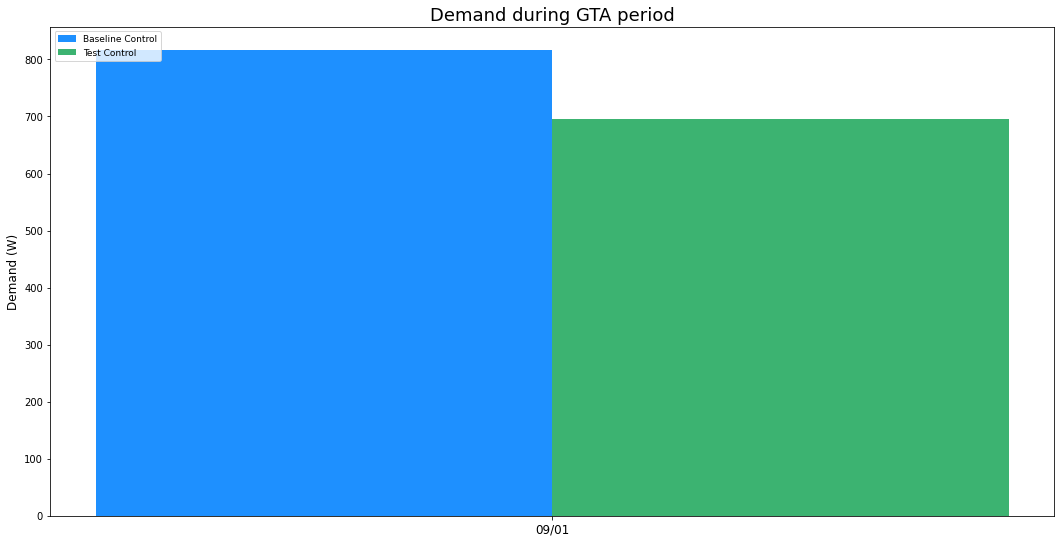

In [217]:

shed_demand_plot(data23, shed_1a, shed_1b, 'Demand during GTA period', 'Demand (W)')

### Thermal comfort

In [218]:
data22 = data22.assign(nor_zat_deg = 'nor_zat_deg') 
#for i in range(len(data20.index)):

def zat_col(df_zat, df_cool_sp):
    df_zat = df_zat.apply(lambda x: (x-32)/1.8)
    df_cool_sp = df_cool_sp.apply(lambda x: (x-32)/1.8)
    
    df_zat_deg = df_zat - df_cool_sp
    df_zat_deg = df_zat_deg.apply(lambda x:0 if x <= 0 else x)
    return (df_zat_deg)

In [219]:
data22['nor_zat_deg'] = zat_col(data22['VAV: North Zone Room Air Temperature'], data_baseline['1A-VAV1-OccupiedCoolingSetpt'])
data22['cor_zat_deg'] = zat_col(data22['VAV: Core Zone Room Air Temperature'], data_baseline['1A-VAV2-OccupiedCoolingSetpt'])
data22['sou_zat_deg'] = zat_col(data22['VAV: South Zone Room Air Temperature'], data_baseline['1A-VAV3-OccupiedCoolingSetpt'])

data23['nor_zat_deg'] = zat_col(data23['1A-VAV1-Zn_Temp'], data23['1A-VAV1-OccupiedCoolingSetpt'])
data23['cor_zat_deg'] = zat_col(data23['1A-VAV2-Zn_Temp'], data23['1A-VAV2-OccupiedCoolingSetpt'])
data23['sou_zat_deg'] = zat_col(data23['1A-VAV3-Zn_Temp'], data23['1A-VAV3-OccupiedCoolingSetpt'])



In [220]:
def calc_stats(df, df_temp):
   
    overshoot = []
    mean = []
    median = []
    std = []
    oc_st = datetime.time(7,0,0)
    oc_en = datetime.time(19,0,0)

    oc_time = ((df['time'] >= oc_st) & (df['time'] <= oc_en))
        
    for day in range(day_range[1],day_range[2]+1):    
        mask_1 = data22['date'] == datetime.date(2021, day_range[0], day)
        daily_mean = df_temp[mask_1][oc_time].mean()
        daily_median = df_temp[mask_1][oc_time].median()
        #print('Variance', df[df[i] > target[i]].var())
        daily_std = df_temp[mask_1][oc_time].std()
        
        mean.append(daily_mean)
        median.append(daily_median)
        std.append(daily_std)
        
        daily_shoot = sum(df_temp[mask_1][oc_time]*.25)
        counter = sum(df_temp[mask_1][oc_time]>0)
        overshoot.append(daily_shoot)
        

    return(overshoot, mean, median, std)

In [221]:
data22_nor_zat_deg, data22_nor_mean, data22_nor_median, data22_nor_std = calc_stats(data22, data22['nor_zat_deg'])
data22_cor_zat_deg, data22_cor_mean, data22_cor_median, data22_cor_std = calc_stats(data22, data22['cor_zat_deg'])
data22_sou_zat_deg, data22_sou_mean, data22_sou_median, data22_sou_std = calc_stats(data22, data22['sou_zat_deg'])

data23_nor_zat_deg, data23_nor_mean, data23_nor_median, data23_nor_std = calc_stats(data23, data23['nor_zat_deg'])
data23_cor_zat_deg, data23_cor_mean, data23_cor_median, data23_cor_std = calc_stats(data23, data23['cor_zat_deg'])
data23_sou_zat_deg, data23_sou_mean, data23_sou_median, data23_sou_std = calc_stats(data23, data23['sou_zat_deg'])

In [222]:
print(data22_nor_zat_deg, data22_nor_mean, data23_nor_median, data23_nor_std)

[0.0] [0.0] [0.0] [15.231362236390147]


In [223]:
scenario_dict = {}
scenario_dict[1] = calc_stats(data22, data22['nor_zat_deg'])
scenario_dict[2] = calc_stats(data22, data22['cor_zat_deg'])
scenario_dict[3] = calc_stats(data22, data22['sou_zat_deg'])

scenario_dict[4] = calc_stats(data23, data23['nor_zat_deg'])
scenario_dict[5] = calc_stats(data23, data23['cor_zat_deg'])
scenario_dict[6] = calc_stats(data23, data23['sou_zat_deg'])

In [224]:
scenario_dict = {'data22': {"nor": calc_stats(data22, data22['nor_zat_deg']),
                            "cor": calc_stats(data22, data22['cor_zat_deg']), 
                            "sou": calc_stats(data22, data22['sou_zat_deg'])}, 
                 
                 'data23': {"nor": calc_stats(data23, data23['nor_zat_deg']),
                            "cor": calc_stats(data23, data23['cor_zat_deg']), 
                            "sou": calc_stats(data23, data23['sou_zat_deg'])}}

In [225]:
print(scenario_dict['data23']['sou'])
print(scenario_dict['data23']['sou'][0][1:5])

([119.57361111111112], [9.761111111111111], [0.0], [14.16200876584783])
[]


In [226]:
print(sum(data22_nor_zat_deg), sum(data23_nor_zat_deg))
print(sum(data22_cor_zat_deg), sum(data23_cor_zat_deg))
print(sum(data22_sou_zat_deg), sum(data23_sou_zat_deg))

0.0 128.44027777777777
0.0 126.7236111111111
1.8843504166666696 119.57361111111112


In [227]:
print(data22_nor_zat_deg,data22_cor_zat_deg,data22_sou_zat_deg)
print(data23_nor_zat_deg,data23_cor_zat_deg,data23_sou_zat_deg)

[0.0] [0.0] [1.8843504166666696]
[128.44027777777777] [126.7236111111111] [119.57361111111112]


In [228]:
import matplotlib.dates as mdates

def thermal_comfort_plot(data_1, inp_1, inp_2, inp_3, inp_4, inp_5, inp_6, scenario_dict, metric, ylabel, title_dict):
    
    # data_1 is the full RAW data, have 6 inputs, 
    
    fig, (ax, ax1, ax2) = plt.subplots(nrows = 3, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',
                                       figsize = (18,9))
    
    
    
    fig.subplots_adjust(hspace = .2, wspace=.15)
    # so the row is 3 and columns is 1 

    inp_day = data_1['date'].unique() # capture unique dates from the date column
    inp_day = inp_day.tolist() #convert to a list for unique days
    
    
    import datetime
    for i in range(len(inp_day)):
        inp_day[i]=datetime.datetime.combine(inp_day[i], datetime.datetime.min.time())

    # create labels for each date of the test
    labels = []
    labels1 = []
    for i in range(0,len(inp_day)):
        labels.append(inp_day[i].strftime('%m/%d'))

    print(labels) # print out the variable "labels" with unique days

    x = np.array(inp_day)
    
    print(x)
    print(inp_1[metric][0:len(labels)+1])# print the 0:overshoot, 1:mean data for all days from the first input
    
    shift1 = datetime.timedelta(hours = 1.5)
    shift2 = datetime.timedelta(hours = 4.5)
    width = datetime.timedelta(hours = 3)
    
    #ax.xaxis_date()
    ax.get_xaxis().set_visible(False)
    ax02 = ax.twinx()
    ax02.plot(data_1['1B-OAT-1'])
    #ax.set_xticks(range(len(labels)))
    ax.bar(x+shift1, inp_1[metric][0:len(labels)+1], width = width, label='Baseline Control', color = 'darkgrey')
    ax.bar(x+shift2, inp_2[metric][0:len(labels)+1], width = width, label='Test Control', color = 'dimgrey')
    
    # plot 1st and 2nd input of the 0:overshoot, 1:mean data with the width data defined above
    
    ax12 = ax1.twinx()
    ax12.plot(data_1['1B-OAT-1'])
    ax1.bar(x+shift1, inp_3[metric][0:len(labels)+1], width = width, label='Baseline Control', color = 'mediumseagreen')
    ax1.bar(x+shift2, inp_4[metric][0:len(labels)+1], width = width, label='Test Control', color = 'olivedrab')
    
    
    # plot 3rd and 4th input of the 0:overshoot, 1:mean data 
    
    
    ax22 = ax2.twinx()
    ax22.plot(data_1['1B-OAT-1'])
    ax2.bar(x+shift1, inp_5[metric][0:len(labels)+1], width = width, label='Baseline Control', color = 'indianred')
    ax2.bar(x+shift2, inp_6[metric][0:len(labels)+1], width = width, label='Test Control', color = 'crimson')
    
    
    # plot 5th and 6th input of the 0:overshoot, 1:mean data 
    fig.suptitle(title_dict, fontsize = 18)  # title for the full plot
    
    ax.set_title('North zone', fontsize = 16)
    ax.set_ylabel(ylabel, fontsize = 9)
    ax.legend(fontsize = 9, loc = 2)
    if metric == 0:
        ax.set_ylim(0,2.5)
    else:
        ax.set_ylim(0,0.5)

    
    ax1.legend(fontsize = 9, loc = 2)
    ax1.set_title('Core zone', fontsize = 16)
    ax1.set_ylabel(ylabel, fontsize = 9)
    if metric == 0:
        ax1.set_ylim(0,2.5)
    else:
        ax1.set_ylim(0,0.5)
        
    ax1.get_xaxis().set_visible(False)

    ax2.legend(fontsize = 9, loc = 2)
    ax2.set_title('South zone', fontsize = 16)
    ax2.set_ylabel(ylabel, fontsize = 9)
    #ax2.set_xticks(range(len(labels)))
    if metric == 0:
        ax2.set_ylim(0,2.5)
    else:
        ax2.set_ylim(0,0.5)
        
        # above sets the y limit and legend font size...
        
        
    
    #ax2.xaxis_date()
    ax2.set_xticklabels(labels, fontsize = 12)

    ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1))  
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d')) 
    for label in ax2.get_xticklabels():
        label.set_rotation(40)     # Format the x label at the last graph!

/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1052/2005965882.py:12: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)
/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1052/2005965882.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels, fontsize = 12)


['09/01']
[datetime.datetime(2021, 9, 1, 0, 0)]
[0.0]


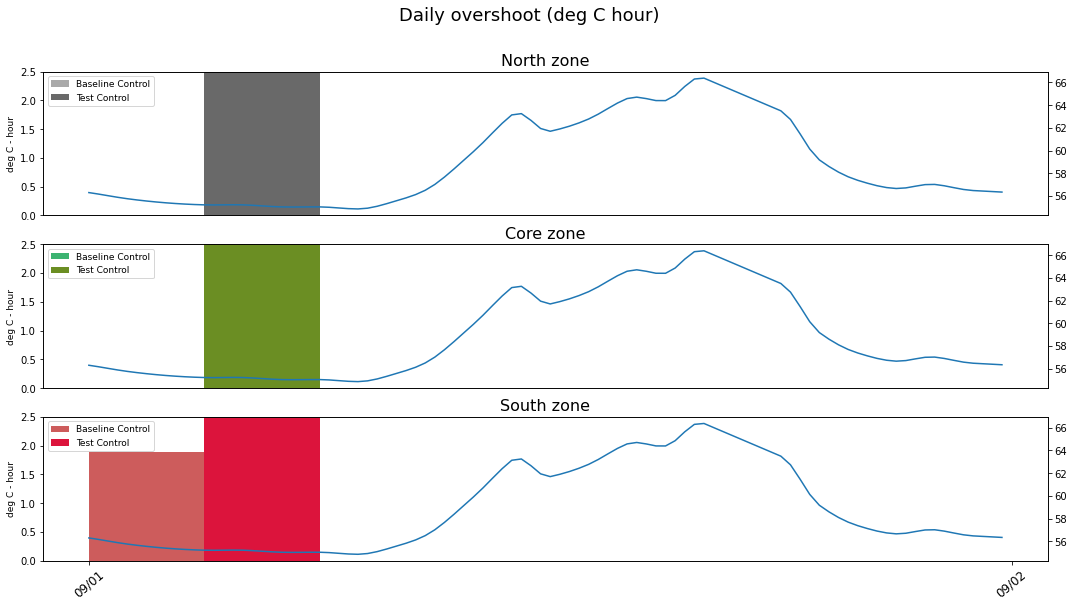

In [231]:
# key for metrics to be plotted in the scenario dictionary; {1:'overshoot', 2:'mean', 3:'median', 4:'std_dev'}
title_dict = {1: 'Daily overshoot (deg C hour)', 2:'Daily overshoot (mean)', 3:'Daily overshoot (median)' , 4:'Daily overshoot (standard deviation)'}
ylabel = {1: 'deg C - hour', 2: 'deg C', 3: 'deg C', 4: 'deg C'}
thermal_comfort_plot(data22, scenario_dict['data22']['nor'], scenario_dict['data23']['nor'], 
                                 scenario_dict['data22']['cor'], scenario_dict['data23']['cor'], 
                                 scenario_dict['data22']['sou'], scenario_dict['data23']['sou'],
                                 scenario_dict, 0, ylabel[1], title_dict[1])

# Zone Air Temperature

/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1052/1970640757.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .4, wspace=.15)


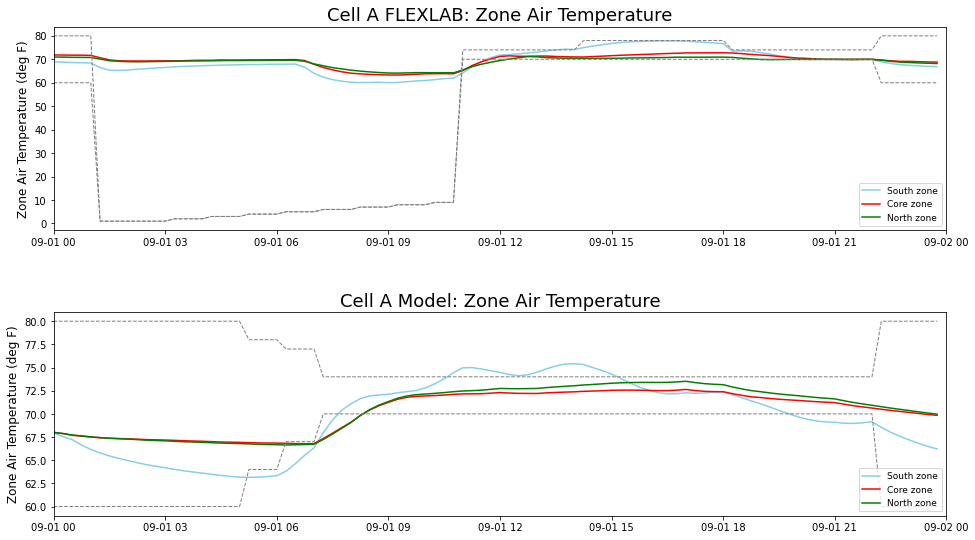

In [230]:
fig, (ax1, ax) = plt.subplots(nrows = 2, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',figsize = (16,9))
fig.subplots_adjust(hspace = .4, wspace=.15)

ax1.plot(data23['1A-VAV3-Zn_Temp'], label = 'South zone', color = 'skyblue')
ax1.plot(data23['1A-VAV2-Zn_Temp'], label = 'Core zone', color = 'red')
ax1.plot(data23['1A-VAV1-Zn_Temp'], label = 'North zone', color = 'green')
ax1.plot(data23['1A-VAV3-OccupiedCoolingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')
ax1.plot(data23['1A-VAV3-OccupiedHeatingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')

ax.plot(data22['VAV: South Zone Room Air Temperature'], label = 'South zone', color = 'skyblue')
ax.plot(data22['VAV: Core Zone Room Air Temperature'], label = 'Core zone', color = 'red')
ax.plot(data22['VAV: North Zone Room Air Temperature'], label = 'North zone', color = 'green')
ax.plot(data_baseline['1A-VAV3-OccupiedCoolingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')
ax.plot(data_baseline['1A-VAV3-OccupiedHeatingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')

ax1.set_ylabel('Zone Air Temperature (deg F)', fontsize = 12)
ax.set_ylabel('Zone Air Temperature (deg F)', fontsize = 12)

ax1.set_title('Cell A FLEXLAB: Zone Air Temperature', fontsize = 18)
ax.set_title('Cell A Model: Zone Air Temperature', fontsize = 18)

ax1.set_xlim([datetime.date(2021, day_range[0], day_range[1]),datetime.date(2021, day_range[0], day_range[2]+1)]) 
ax.set_xlim([datetime.date(2021, day_range[0], day_range[1]),datetime.date(2021, day_range[0], day_range[2]+1)])


#ax1.set_xlim(["2021-08-20 08:50:00"],["2021-08-22 00:00:00"]) 
#ax.set_xlim(["2021-08-20 08:50:00"],["2021-08-22 00:00:00"])

ax.legend(fontsize = 9, loc = 4)
ax1.legend(fontsize = 9, loc = 4)